In [1]:
#Building a logistic regression model with the Diabetes dataset with reference to Internship Task 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#reading dataset
df= pd.read_csv('Healthcare-Diabetes.csv')
df.tail()


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [2]:
df.head()


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape


(2768, 10)

In [4]:
df.columns


Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#dropping the ID column
df= df.drop('Id',axis=1)
df.info


<bound method DataFrame.info of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                   

In [7]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

<AxesSubplot:xlabel='BMI'>

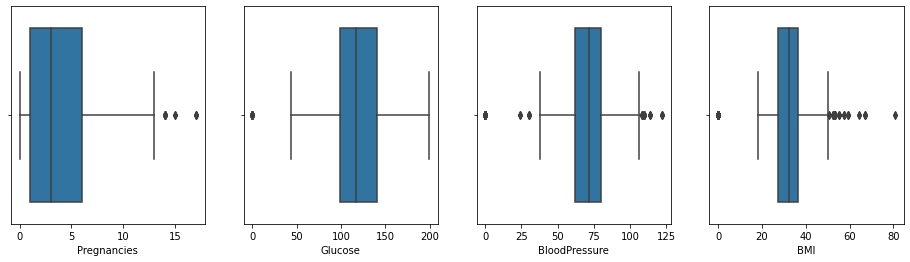

In [13]:
#Exploratory data analysis
plt.rcParams['figure.figsize']=(16,4)
plt.subplot(1,4,1)
sns.boxplot(df['Pregnancies'])
plt.subplot(1,4,2)
sns.boxplot(df['Glucose'])
plt.subplot(1,4,3)
sns.boxplot(df['BloodPressure'])
plt.subplot(1,4,4)
sns.boxplot(df['BMI'])


<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

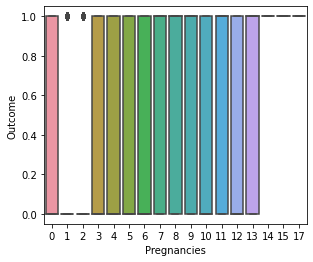

In [15]:
#plotting bivariate dependencies
plt.subplot(1,4,1)
sns.boxplot(y=df['Outcome'],x=df['Pregnancies'])


<AxesSubplot:xlabel='Age', ylabel='Outcome'>

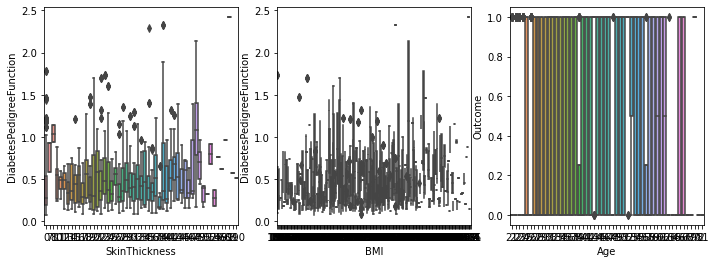

In [17]:
#Plotting different relations
plt.subplot(1,4,2)
sns.boxplot(y=df['DiabetesPedigreeFunction'],x=df['SkinThickness'])
plt.subplot(1,4,3)
sns.boxplot(y=df['DiabetesPedigreeFunction'],x=df['BMI'])

plt.subplot(1,4,4)
sns.boxplot(y=df['Outcome'],x=df['Age'])


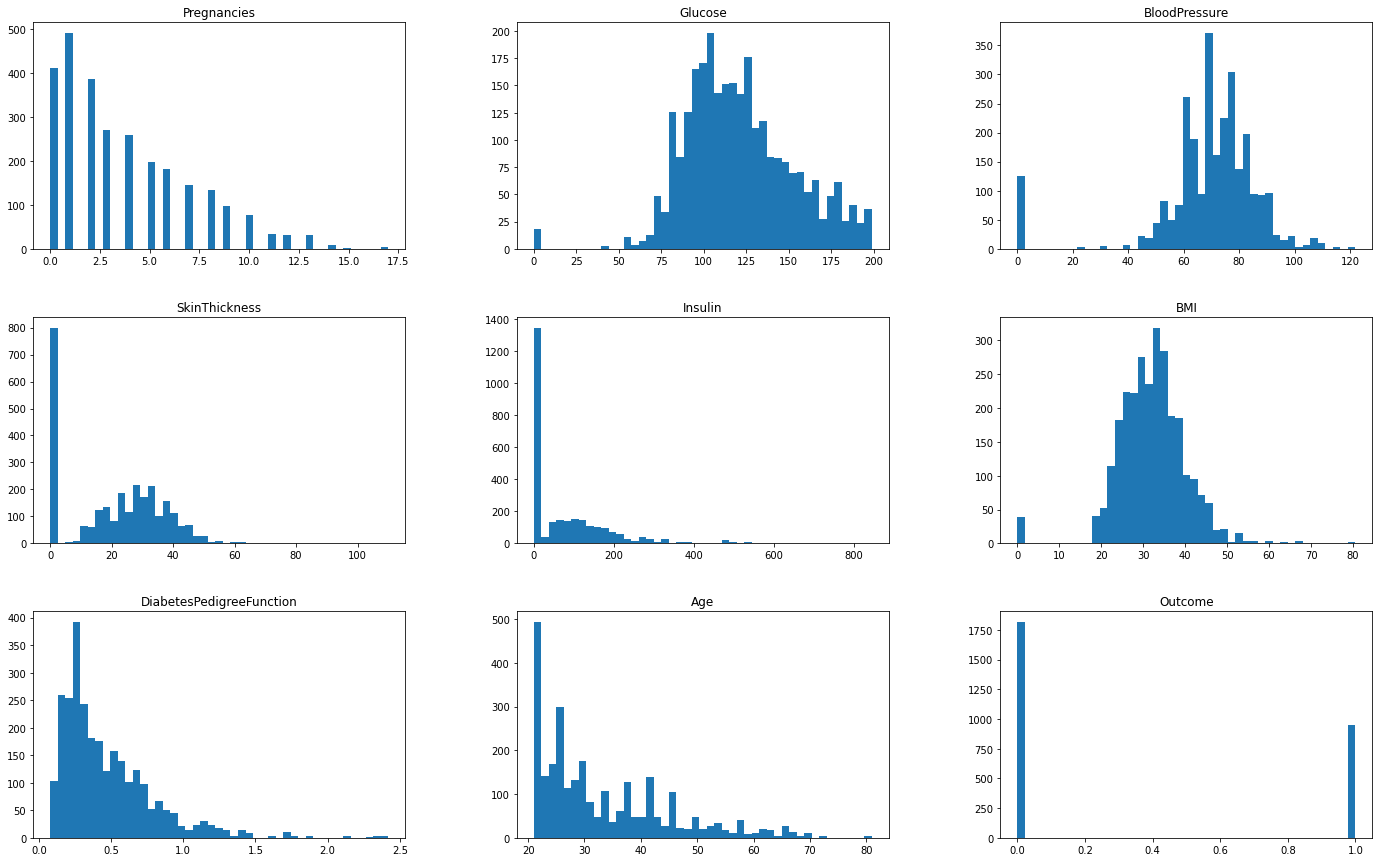

In [27]:
df.hist(bins=45, grid= False, figsize=(24,15));


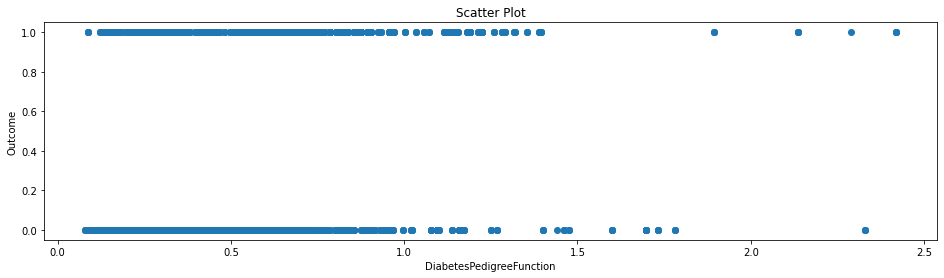

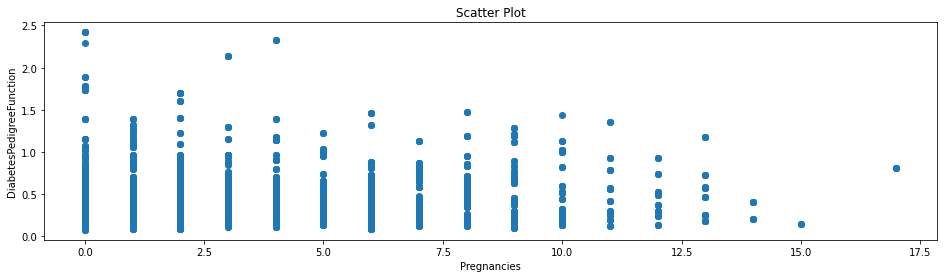

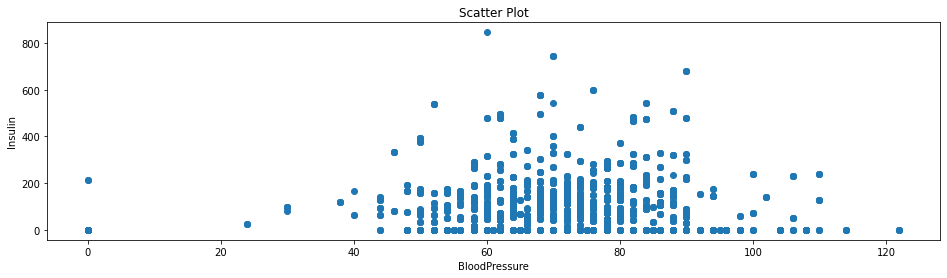

In [34]:
#Finding scatterplot
plt.scatter(df['DiabetesPedigreeFunction'],df['Outcome'])
plt.title("Scatter Plot")
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome')
plt.show()

plt.scatter(df['Pregnancies'],df['DiabetesPedigreeFunction'])
plt.title("Scatter Plot")
plt.xlabel('Pregnancies')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

plt.scatter(df['BloodPressure'],df['Insulin'])
plt.title("Scatter Plot")
plt.xlabel('BloodPressure')
plt.ylabel('Insulin')
plt.show()


<AxesSubplot:>

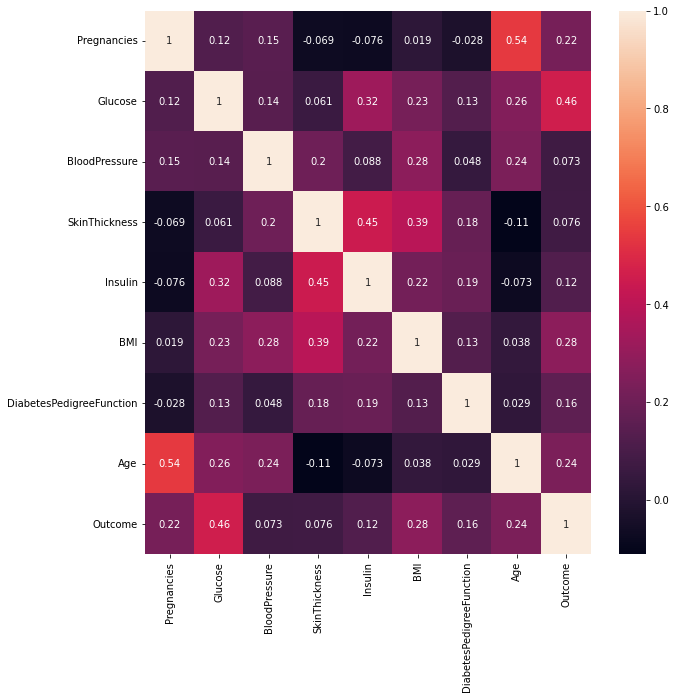

In [36]:
fig,ax= plt.subplots(figsize=(10,10))
corr= df.corr()
sns.heatmap(corr,annot=True,ax=ax)


In [40]:
#Building the regression model
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.17,random_state=0)

#model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


y_pred = model.predict(x_test)
#MAE, RMSE AND MSE SCORES HELP TO KNOW THE DEVIATION OF PREDICTED VALUES FROM ACTUAL VALUES
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 0.21443736730360935
MSE: 0.21443736730360935
RMSE: 0.46307382489578197


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
model.score(x_test,y_test)


0.7855626326963907

In [42]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [49]:
sigmoid(model.coef_.dot(x_test[337,:])+ model.intercept_)
np.round(sigmoid(model.coef_.dot(x_test[15,:])+ model.intercept_))
model.predict(x_test[10,:].reshape(1,-1))


array([0], dtype=int64)

In [56]:
model.score(x_test,y_test)



0.7855626326963907

In [3]:
#Feature selection part 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#reading dataset
df= pd.read_csv('Healthcare-Diabetes.csv')
df.head()


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#
df= df.drop('Id',axis=1)
df.info


<bound method DataFrame.info of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                   

In [6]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.17,random_state=0)

#model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
model = LogisticRegression()
rfecv= RFECV(model,step=1, min_features_to_select=6,n_jobs=-1)
rfecv.fit(x_train,y_train)
rfecv.support_
rfecv.ranking_
selected_features= np.where(rfecv.support_)[0]
x_train= x_train[:,selected_features]
x_test= x_test[:,selected_features]
model.fit(x_train,y_train)
model.score(x_test,y_test)


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

0.7855626326963907